In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
athlete_events = pd.read_csv('athlete_events.csv')
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athlete_events_dd = pd.read_csv('athlete_events_data_dictionary.csv')
athlete_events_dd.head()

,Field,Description
0,ID,Unique number for each athlete
1,Name,Athlete's name
2,Sex,Male (M) or Female (F)
3,Age,Integer
4,Height,In centimeters


In [5]:
country_def = pd.read_csv('country_definitions.csv')
country_def.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
country_def['notes'].unique()

array([nan, 'Netherlands Antilles', 'Antigua and Barbuda', 'Australasia',
       'Bohemia', 'Crete', 'Hong Kong', 'Individual Olympic Athletes',
       'Virgin Islands', 'North Borneo', 'Newfoundland',
       'Refugee Olympic Team', 'Serbia and Montenegro',
       'Turks and Caicos Islands', 'Trinidad and Tobago', 'Tuvalu',
       'United Arab Republic', 'Unknown', 'West Indies Federation',
       'North Yemen', 'South Yemen', 'Yugoslavia'], dtype=object)

In [7]:
country_def_dd = pd.read_csv('country_definitions_data_dictionary.csv')
country_def_dd.head()

,Field,Description
0,NOC,National Olympic Committee 3 letter code
1,region,Country name used for geospatial mapping
2,notes,"Real country name if ""region"" isn't an exact m..."


### Cleaning the Data ###

In [7]:
athlete_events = pd.read_csv('athlete_events.csv')
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
#Checking For null values
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
#finding the percentage of null values
for i in athlete_events.columns:

    print("percentage of null values in",i,(athlete_events.isna().sum()[i]/len(athlete_events)*100),"%")

percentage of null values in ID 0.0 %
percentage of null values in Name 0.0 %
percentage of null values in Sex 0.0 %
percentage of null values in Age 3.49444518213606 %
percentage of null values in Height 22.193821095029435 %
percentage of null values in Weight 23.19118015904631 %
percentage of null values in Team 0.0 %
percentage of null values in NOC 0.0 %
percentage of null values in Games 0.0 %
percentage of null values in Year 0.0 %
percentage of null values in Season 0.0 %
percentage of null values in City 0.0 %
percentage of null values in Sport 0.0 %
percentage of null values in Event 0.0 %
percentage of null values in Medal 85.3262072323286 %


* 3.5% of missing values are present in the Age column.Since the % of missing values is less it can be replaced with mean of age

Mode Value:  0    23.0
Name: Age, dtype: float64
Mean Value:  25.556898357297374
Median Value:  24.0


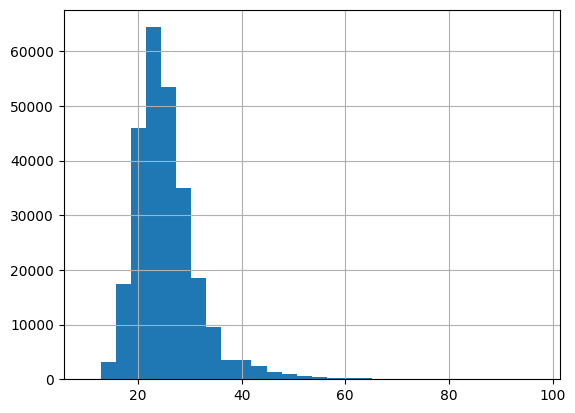

In [12]:
athlete_events['Age'].hist(bins=30)

print("Mode Value: ",athlete_events['Age'].mode())
print("Mean Value: ",athlete_events['Age'].mean())
print("Median Value: ",athlete_events['Age'].median())

In [13]:
athlete_events['Age'].fillna(athlete_events['Age'].mean().round(1),inplace=True)

Mode Value:  0    180.0
Name: Height, dtype: float64
Mean Value:  175.33896987366376
Median Value:  175.0


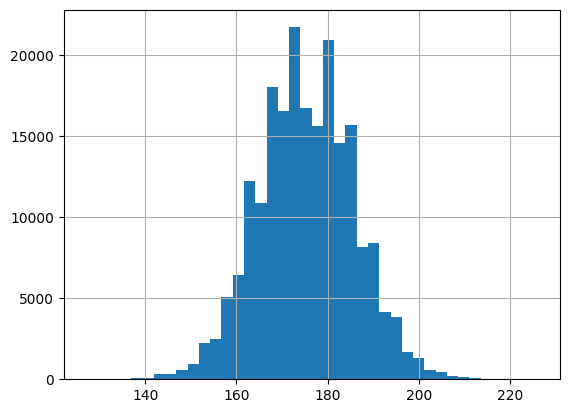

In [14]:


athlete_events['Height'].hist(bins=40)
print("Mode Value: ",athlete_events['Height'].mode())
print("Mean Value: ",athlete_events['Height'].mean())
print("Median Value: ",athlete_events['Height'].median())

<AxesSubplot: >

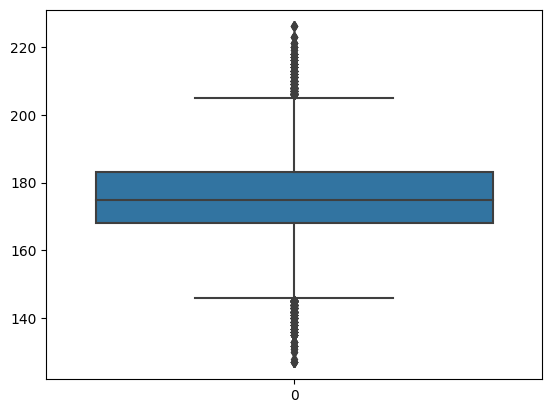

In [15]:
sns.boxplot(athlete_events['Height'])

* It can be observed that the height column is normally distributed.So the missing values in the height column can be replaced with the mean value.

In [16]:
athlete_events['Height'].fillna(athlete_events['Height'].mean().round(1),inplace = True)

Mode Value:  0    70.0
Name: Weight, dtype: float64
Mean Value:  70.70239290053351
Median Value:  70.0


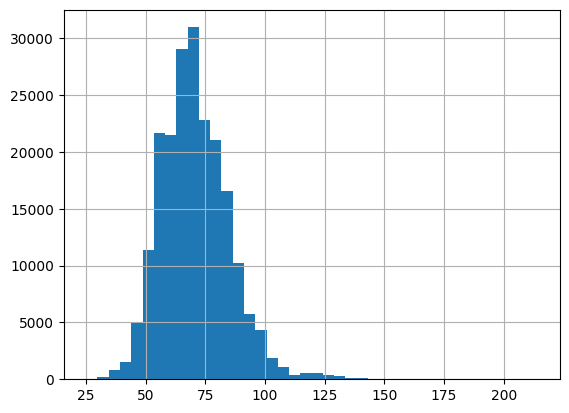

In [17]:
athlete_events['Weight'].hist(bins=40)
print("Mode Value: ",athlete_events['Weight'].mode())
print("Mean Value: ",athlete_events['Weight'].mean())
print("Median Value: ",athlete_events['Weight'].median())

<AxesSubplot: >

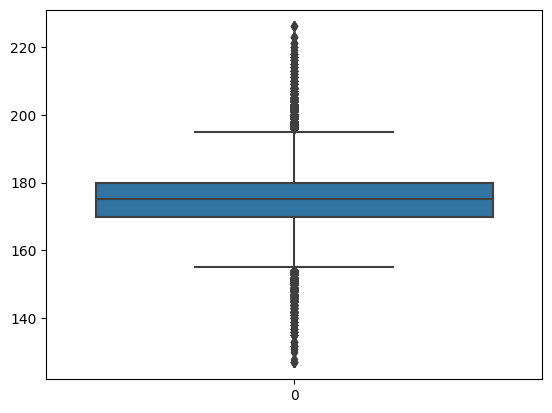

In [18]:
sns.boxplot(athlete_events['Height'])

* Values in the Weight column are normally distributed.So the missing values will be replaced with mean value.

In [19]:
athlete_events['Weight'].fillna(athlete_events['Weight'].mean().round(1),inplace = True)

In [20]:
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [21]:
athlete_events.to_csv('athlete_events_updated.csv')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.3,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.3,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
